In [1]:
import pandas as pd
import json
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
def read_result(filename):
    df = pd.read_csv(filename)
    
    row = df.iloc[0]
    
    result = {
        'error': row['Error'],
        'portfolio': json.loads(row['Portfolio Weights']),
        'performance': {
            'train_performance': {
                'tracking_error': row['Train Tracking Error'],
                'root_mean_squared_error': row['Train RMSE'],
                'correlation': row['Train Correlation']
            },
            'test_performance': {
                'tracking_error': row['Test Tracking Error'],
                'root_mean_squared_error': row['Test RMSE'],
                'correlation': row['Test Correlation']
            }
        },
        'optimization_time': row['Optimization Time']
    }
    return result

In [3]:
def plot_portfolio(portfolio, stocks_data, index_data, start_date, end_date, index_name):
    a = [key for key in portfolio if key in stocks_data.columns]
    portfolio_data = stocks_data[a]

    weights = pd.Series(portfolio).reindex(a).values

    scaler = MinMaxScaler()

    portfolio_data_filtered = (portfolio_data * weights).sum(axis=1).loc[start_date:end_date]
    portfolio_data_normalized = scaler.fit_transform(portfolio_data_filtered.values.reshape(-1, 1))

    index_data_filtered = index_data.loc[start_date:end_date]
    index_data_normalized = scaler.fit_transform(index_data_filtered.values.reshape(-1, 1))

    start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')
    end_date_str = pd.to_datetime(end_date).strftime('%Y-%m-%d')

    fig = plt.figure(figsize=(15, 8), facecolor='black')
    eixo = fig.add_axes([0, 0, 1, 1], facecolor='black')

    eixo.plot(index_data_filtered.index, index_data_normalized, color='red', linestyle='-', linewidth=3, label=index_name)
    eixo.plot(portfolio_data_filtered.index, portfolio_data_normalized, color='gold', linestyle='--', linewidth= 3, label="Portfolio")

    eixo.set_title(f"Portfolio 25 stocks {index_name}: {start_date_str} to {end_date_str}", fontsize=25, pad=20, color='white')
    eixo.legend(title="Indicador", loc='upper left', fontsize=15, facecolor='black', edgecolor='white', title_fontsize=15, labelcolor='white')
    eixo.set_ylabel('Normalized Value', fontsize=20, color='white')
    eixo.set_xlabel('Data', fontsize=20, color='white')
    eixo.tick_params(colors='white')
    eixo.grid(color='gray', linestyle='--')
    plt.show()

In [4]:
def plot_portfolio_variance(portfolio, stocks_data, index_data, start_date, end_date, index_name):
    a = [key for key in portfolio if key in stocks_data.columns]
    portfolio_data = stocks_data[a]

    weights = pd.Series(portfolio).reindex(a).values

    portfolio_data_filtered = (portfolio_data * weights).sum(axis=1).loc[start_date:end_date]

    index_data_filtered = index_data.loc[start_date:end_date]

    start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')
    end_date_str = pd.to_datetime(end_date).strftime('%Y-%m-%d')

    fig = plt.figure(figsize=(15, 8), facecolor='black')
    eixo = fig.add_axes([0, 0, 1, 1], facecolor='black')

    eixo.plot(index_data_filtered.index, index_data_filtered, color='red', linestyle='-', linewidth=3, label=index_name)
    eixo.plot(portfolio_data_filtered.index, portfolio_data_filtered, color='gold', linestyle='--', linewidth= 3, label="Portfolio")

    eixo.set_title(f"Portfolio 25 stocks {index_name}: {start_date_str} to {end_date_str}", fontsize=25, pad=20, color='white')
    eixo.legend(title="Indicador", loc='upper left', fontsize=15, facecolor='black', edgecolor='white', title_fontsize=15, labelcolor='white')
    eixo.set_ylabel('Normalized Value', fontsize=20, color='white')
    eixo.set_xlabel('Data', fontsize=20, color='white')
    eixo.tick_params(colors='white')
    eixo.grid(color='gray', linestyle='--')
    plt.show()

In [5]:
# Organizig data
bvsp_index_ticker = '^BVSP'

bvsp_data_values = pd.read_csv('stock_values_^BVSP.csv', index_col=0)  # Inclui o índice
bvsp_data_variance = pd.read_csv('stock_variance_^BVSP.csv', index_col=0)

bvsp_index_values = bvsp_data_values[bvsp_index_ticker]
bvsp_stocks_values = bvsp_data_values.drop(columns=[bvsp_index_ticker])

bvsp_index_variance = bvsp_data_variance[bvsp_index_ticker]
bvsp_stock_variance = bvsp_data_variance.drop(columns=[bvsp_index_ticker])

sp100_index_ticker = '^BVSP'

sp100_data_values = pd.read_csv('stock_values_^OEX.csv', index_col=0)  # Inclui o índice
sp100_data_variance = pd.read_csv('stock_variance_^OEX.csv', index_col=0)

sp100_index_values = sp100_data_values[sp100_index_ticker]
sp100_stocks_values = sp100_data_values.drop(columns=[sp100_index_ticker])

sp100_index_variance = sp100_data_variance[sp100_index_ticker]
sp100_stock_variance = sp100_data_variance.drop(columns=[sp100_index_ticker])

start_date_dataset = "2023-01-01"
end_date_dataset = "2024-01-01"
train_start = start_date_dataset
train_end = "2023-06-01"
test_start = "2023-06-02"
test_end = end_date_dataset

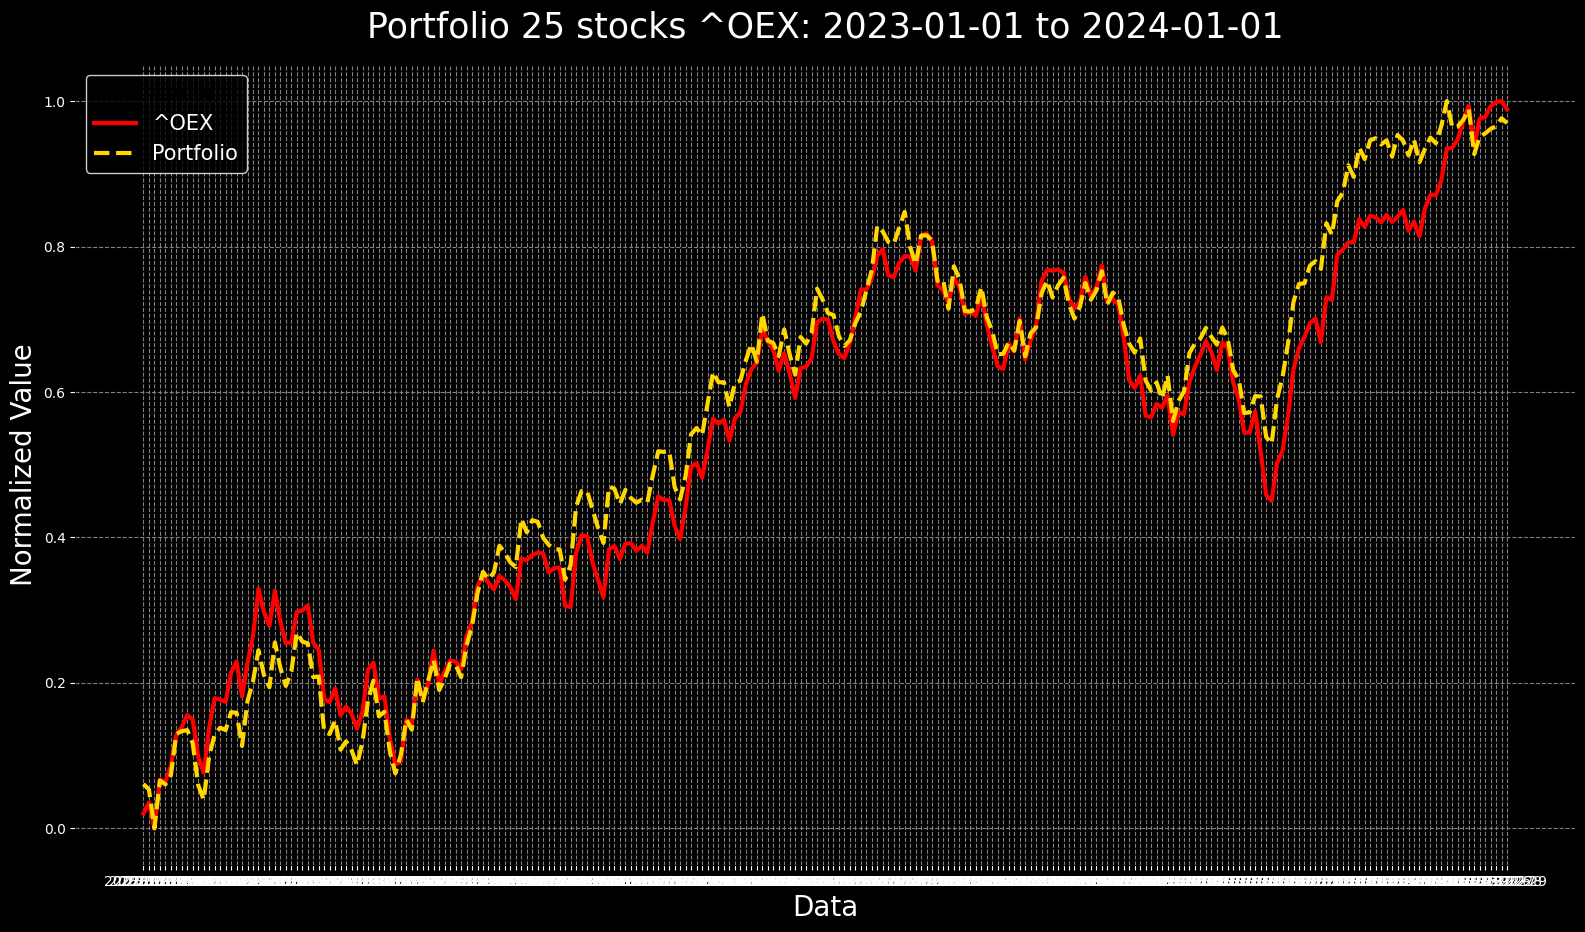

In [6]:
result = read_result("result_10stocks_1000000iterations.csv")
plot_portfolio(result['portfolio'], sp100_stocks_values, sp100_index_values, start_date_dataset, end_date_dataset, sp100_index_ticker)